In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sl

import seaborn as sns; sns.set()
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
%matplotlib inline

In [3]:
from scipy import integrate

# (A) Integrales

In [4]:
x1 = np.linspace(1e-06,1,int(1e+06)) 
x2 = np.linspace(1e-06,100,int(1e+06))

In [5]:
def fun1(x):
    return x**(-1/2)

In [6]:
def fun2(x):
    return e**(-x)

In [7]:
def fun3(x):
    return sin(x)/x

In [8]:
y1 = fun1(x1)

In [9]:
y2 = fun2(x2)

In [10]:
y3 = fun3(x2)

In [11]:
print("Primera integral",sp.integrate.simpson(y1, x1))

Primera integral 1.9980152377229563


In [12]:
print("Segunda integral",sp.integrate.simpson(y2, x2))

Segunda integral 0.9999990000005418


In [13]:
print("Tercera integral",sp.integrate.simpson(y3, x2))

Tercera integral 1.5622244668890422


# (B) Fourier 

In [14]:
#Transformada usando la funcion Tarea D) 

In [15]:
a = 0.68739888 
b = 1.39239105 
c = 0.49564803 
omega = 0.936637  

In [16]:
df = pd.read_pickle(r"C:\Users\Laura\Downloads\ex1.gz")

In [17]:
x = df["x"]

In [18]:
y_ = df["y"]

In [19]:
y = a/((x-b)**2 + c)**omega

In [20]:
Nf = 25
a = np.min(x)
b = np.max(x)
def a_j(j):
    global a, b, x, y
    # integra la funcion entre 0 y 10
    L = b - a
    k_j = 2*j*np.pi/L
    new_y = y*np.cos(k_j*x)/L
    if j > 0:
        new_y = new_y * 2
    return sp.integrate.simpson(new_y, x)
def b_j(j):
    global a, b, x, y
    # integra la funcion entre 0 y 10
    L = b - a
    k_j = 2*j*np.pi/L
    new_y = y*np.sin(k_j*x)/L
    if j > 0:
        new_y = new_y * 2
    return sp.integrate.simpson(new_y, x)
J = np.array(range(Nf))
A_j = np.array([a_j(j) for j in range(Nf)])
B_j = np.array([b_j(j) for j in range(Nf)])

In [21]:
A_j

array([ 0.58187845, -0.33444516, -0.07417718,  0.0294868 , -0.03051049,
       -0.0084893 , -0.01000459, -0.02587848,  0.01598463, -0.03242595,
       -0.02697855, -0.00198519, -0.0542143 ,  0.08751044, -0.05261719,
        0.05398262,  0.09744844, -0.19508638,  0.11948278,  0.05451492,
       -0.19875167,  0.07693424, -0.01001765,  0.04095636,  0.03025459])

In [22]:
B_j

array([ 0.        ,  0.4225906 , -0.1190738 ,  0.03227525,  0.02094597,
        0.00145533,  0.01407725, -0.00934128,  0.01022793,  0.03637447,
       -0.05860388,  0.05446867, -0.05251547, -0.02034912,  0.06707885,
       -0.06633479,  0.0763615 ,  0.07642617, -0.10730971,  0.14887532,
       -0.08507877,  0.00759668,  0.00760226, -0.09926775,  0.09805382])

In [23]:
x_tilde = np.linspace(0,4,10000)
k_j = np.array([2*j*np.pi/4 for j in range(Nf)])
y_tilde = np.sum([
    A_j[j] * np.cos(k_j[j]*x_tilde) + B_j[j] * np.sin(k_j[j]*x_tilde) for j in range(Nf)
], axis=0)

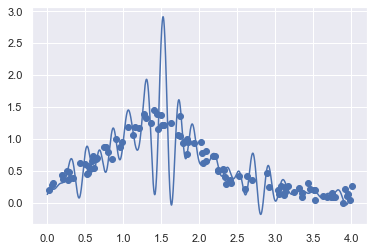

In [24]:
plot(x_tilde,y_tilde)
scatter(x,y_)

In [25]:
#Transformada usando el metodod de regresion exacta 

In [26]:
L = max(x) - min(x)

In [27]:
x_newbase2 = np.array(x).reshape(-1,1)

In [28]:
y_newbase2 = np.array(y_)

In [29]:
len(x_newbase2)

100

In [30]:
P = np.array([np.ones([len(x), 1]),
              cos((2*pi/L)*x_newbase2),
              sin((2*pi/L)*x_newbase2),
              cos((2*pi/L)*2*x_newbase2),
              sin((2*pi/L)*2*x_newbase2),
              cos((2*pi/L)*3*x_newbase2),
              sin((2*pi/L)*3*x_newbase2),
              cos((2*pi/L)*4*x_newbase2),
              sin((2*pi/L)*4*x_newbase2),
              cos((2*pi/L)*5*x_newbase2),
              sin((2*pi/L)*5*x_newbase2)]).reshape(11, len(x)).T

In [31]:
P[0]

array([1.        , 0.99461517, 0.10363717, 0.97851867, 0.2061582 ,
       0.95188387, 0.30645898, 0.91499759, 0.4034593 , 0.86825711,
       0.4961145 ])

In [32]:
v = np.linalg.inv(P.T @ P) @ P.T @ y

In [33]:
len(v)

11

In [34]:
def fun_(x,a,b,c,d,e,f,g,h,i,j,k):
    global L
    return(
        a  
        +b*cos((2*pi/L)*x_newbase2)
        +c*sin((2*pi/L)*x_newbase2)
        +d*cos((2*pi/L)*2*x_newbase2)
        +e*sin((2*pi/L)*2*x_newbase2)
        +f*cos((2*pi/L)*3*x_newbase2)
        +g*sin((2*pi/L)*3*x_newbase2)
        +h*cos((2*pi/L)*4*x_newbase2)
        +i*sin((2*pi/L)*4*x_newbase2)
        +j*cos((2*pi/L)*5*x_newbase2)
        +k*sin((2*pi/L)*5*x_newbase2)
    
    
    )

In [38]:
y_real_ = fun_(x,v[0],v[1],v[2],v[3],v[4],v[5],v[6],v[7],v[8],v[9],v[10])

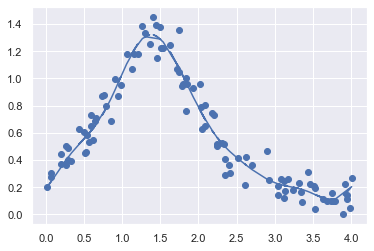

In [41]:
plot(x,y_real_)
scatter(x,y_)